# NEUB CSE-432 Spring 2025 Lab 9

## Task 1
Convolution By DFT and IDFT (Example 7.3.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,2,1]
h = [1,2,3]

# N = len(x) + len(h) - 1
N=8

y = np.convolve(x,h,'full')
print("Convolution using NumPy function")
print(y)


# DFT
def DFT(x,N):
    X = np.zeros(N,dtype = 'complex')
    for k in range(N):
        for n in range(N):
            X[k] = X[k] + x[n]*np.exp(-1j*2*np.pi*k*n/N)
    return X
# IDFT
def IDFT(X, N):
    y = np.zeros(N,dtype = 'complex')
    for n in range(N):
        for k in range(N):
            y[n] = y[n] + X[k]*np.exp(1j*2*np.pi*k*n/N)    
    return y/N

x = np.pad(x, (0, N-len(x)), 'constant',constant_values=0)
h = np.pad(h, (0, N-len(h)), 'constant',constant_values=0)
X = DFT(x,N)
H = DFT(h,N)
Y = X*H
# y = np.real(IDFT(Y,N))  
y = np.real(IDFT(Y,N)).astype(int)
print("Convolution using DFT and IDFT")
print(y)

Convolution using NumPy function
[ 1  4  9 11  8  3]
Convolution using DFT and IDFT
[ 0  4  9 11  7  2  0  0]


## Task 2
Effect of Zero Padding to improve spectral resolution of DFT

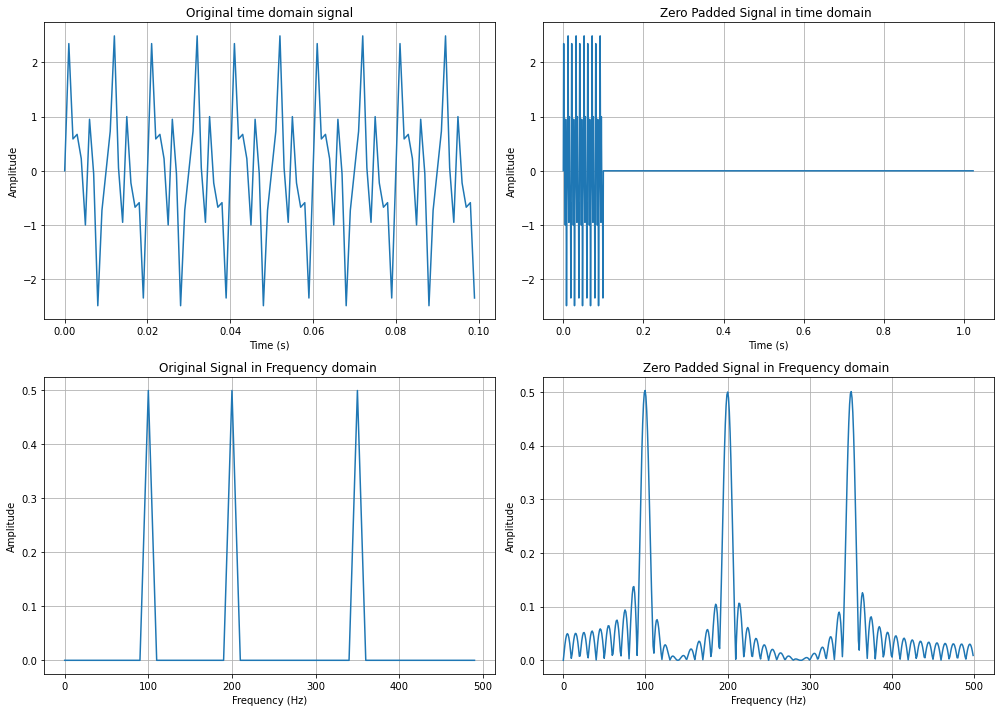

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f1=100
f2=200
f3=350
Fs=1000 #Sampling frequency of 1000hz
T=0.1 #Signal duration of 0.11s
L=64 #No of sample to visualize

t=np.linspace(0,T,int(Fs*T), endpoint=False)
x1=np.sin(2*np.pi*f1*t)
x2=np.sin(2*np.pi*f2*t)
x3=np.sin(2*np.pi*f3*t)
x=x1+x2+x3
N=len(x)

N_zp=1024
x_zp=np.pad(x,(0,N_zp-N), 'constant', constant_values=0)
t_zp=np.linspace(0,T*N_zp/N,N_zp, endpoint=False)

X1=np.fft.fft(x)
X2=np.fft.fft(x_zp)
f1=np.fft.fftfreq(N, d=1/Fs)
f2=np.fft.fftfreq(N_zp, d=1/Fs)
mag1=np.abs(X1[:N//2]/N)
mag2=np.abs(X2[:N_zp//2]/N)

plt.figure(figsize=(14,10))

#Time Domain: Original Signal
plt.subplot(2,2,1)
plt.plot(t,x)
plt.title("Original time domain signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

#Time Domain: Zero Padded signal
plt.subplot(2,2,2)
plt.plot(t_zp,x_zp)
plt.title("Zero Padded Signal in time domain ")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

#Frequency Domain: Original signal
plt.subplot(2,2,3)
plt.plot(f1[:N//2],mag1)
plt.title("Original Signal in Frequency domain ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

#Frequency Domain: Zero Padded signal
plt.subplot(2,2,4)
plt.plot(f2[:N_zp//2],mag2)
plt.title("Zero Padded Signal in Frequency domain ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()